In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [3]:
# Fix the interval [a, b] and sample n points x from this range uniformly
a = 0
b = 2 * np.pi  
n = 100

In [4]:
# Generate n equally spaced points in the interval [a, b]
x_train = np.linspace(a, b, n)
y_train = np.sin(x_train)

In [5]:
# Build the Lagrange interpolation model
lagrange_poly = lagrange(x_train, y_train)

In [6]:
# Generate a test set using the same distribution
x_test = np.linspace(a, b, n * 2)  # You can adjust the size of the test set as needed
y_test = np.sin(x_test)

In [7]:
# Evaluate the Lagrange interpolation model on both the training and test sets
y_train_pred = lagrange_poly(x_train)
y_test_pred = lagrange_poly(x_test)

In [8]:
# Calculate mean squared error for train and test sets (in log space)
train_mse = np.log(mean_squared_error(y_train, y_train_pred))
test_mse = np.log(mean_squared_error(y_test, y_test_pred))

In [9]:
# Print the results
print("Train Log Mean Squared Error:", train_mse)
print("Test Log Mean Squared Error:", test_mse)


Train Log Mean Squared Error: 318.70422334385216
Test Log Mean Squared Error: 318.4176039270401


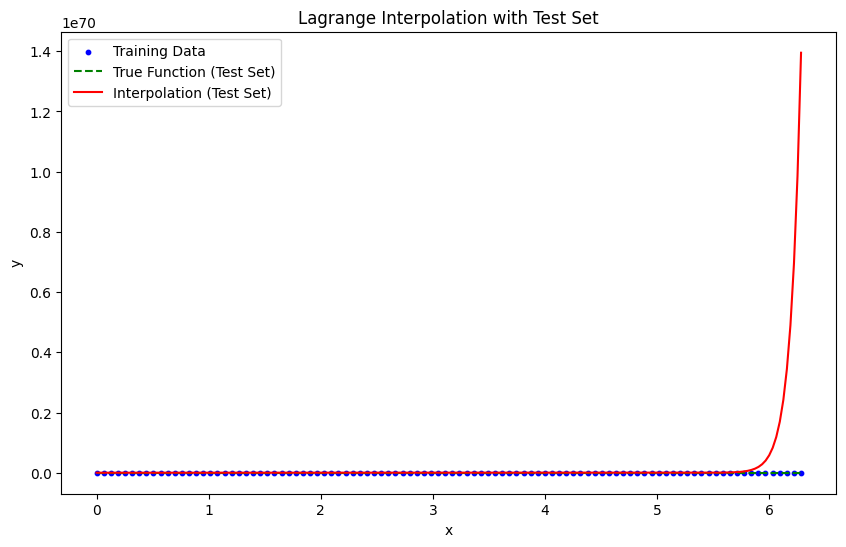

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue', s=10)
plt.plot(x_test, y_test, label='True Function (Test Set)', color='green', linestyle='--')
plt.plot(x_test, y_test_pred, label='Interpolation (Test Set)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Lagrange Interpolation with Test Set')
plt.show()

## for dataset with added gaussian noise


Sigma = 0.01
Train Log Mean Squared Error: 316.3259113369784
Test Log Mean Squared Error: 318.4176039270401

Sigma = 0.1
Train Log Mean Squared Error: 335.47553472887165
Test Log Mean Squared Error: 318.4176039270401

Sigma = 0.5
Train Log Mean Squared Error: 331.6265765348406
Test Log Mean Squared Error: 318.4176039270401

Sigma = 1.0
Train Log Mean Squared Error: 335.5503583199556
Test Log Mean Squared Error: 318.4176039270401

Sigma = 2
Train Log Mean Squared Error: 335.3656689503922
Test Log Mean Squared Error: 318.4176039270401

Sigma = 3
Train Log Mean Squared Error: 362.00460637942854
Test Log Mean Squared Error: 318.4176039270401

Sigma = 4
Train Log Mean Squared Error: 298.33692140216766
Test Log Mean Squared Error: 318.4176039270401



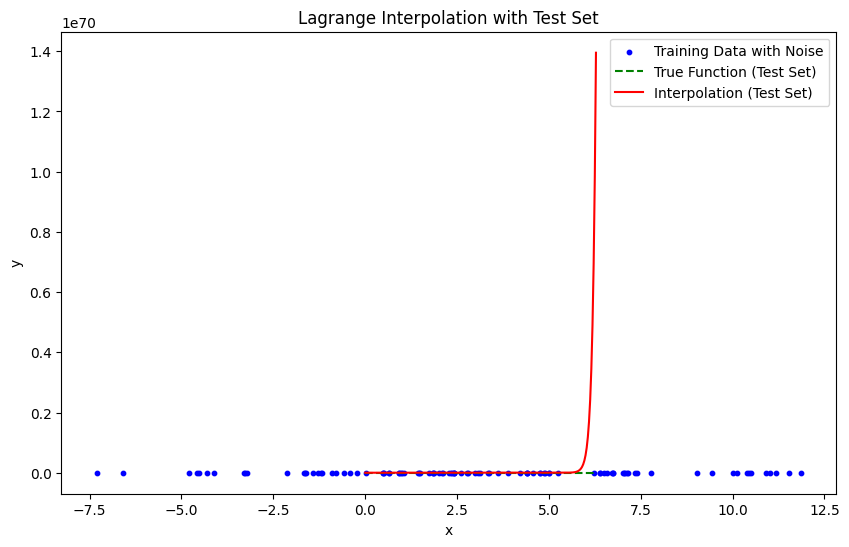

In [20]:
# Vary the standard deviation for epsilon
sigma_values = [0.01, 0.1, 0.5, 1.0, 2, 3, 4]
for sigma in sigma_values:
    # Add zero-mean Gaussian noise to x
    epsilon = np.random.normal(0, sigma, n)
    x_train_with_noise = x_train + epsilon
    y_train = np.sin(x_train_with_noise)
    lagrange_poly = lagrange(x_train_with_noise, y_train)
     # Evaluate the Lagrange interpolation model on the training set with noise
    y_train_pred = lagrange_poly(x_train_with_noise)
     # Calculate mean squared error for train and test sets (in log space)
    train_mse = np.log(mean_squared_error(y_train, y_train_pred))
    test_mse = np.log(mean_squared_error(y_test, y_test_pred))
    # Print the results
    print(f"Sigma = {sigma}")
    print("Train Log Mean Squared Error:", train_mse)
    print("Test Log Mean Squared Error:", test_mse)
     
    print()

# Plot the original data, interpolation, and test set
plt.figure(figsize=(10, 6))
plt.scatter(x_train_with_noise, y_train, label='Training Data with Noise', color='blue', s=10)
plt.plot(x_test, y_test, label='True Function (Test Set)', color='green', linestyle='--')
plt.plot(x_test, y_test_pred, label='Interpolation (Test Set)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Lagrange Interpolation with Test Set')
plt.show()
    